1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях `k`.

In [115]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [116]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [117]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

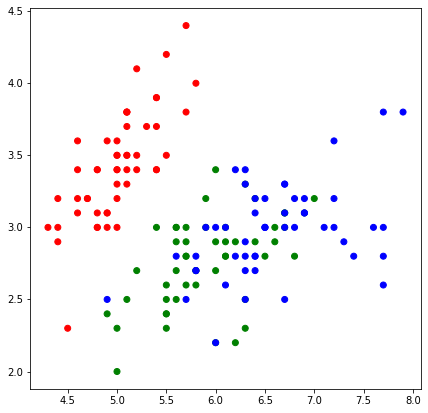

In [118]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [119]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [120]:
e_metrics(x, x_train[1])

NameError: name 'x' is not defined

In [ ]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in k_neighbours:
            classes[d[1]] += 1 # вес каждого соседа равен 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

ВВЕДЕМ ВЕСА в зависимости от номера соседа  𝑖 :
- $w(i) = \frac{1}{i}$;
- $w(i) = q^{i}$,   $q \in (0,1)$;
- $w(d) = q^{d}$,   $q \in (0,1)$;

In [ ]:
def knn_w(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])/(i+1)
        
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in k_neighbours:
            classes[d[1]] += 1 # вес каждого соседа равен 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [ ]:
def knn_ww(x_train, y_train, x_test, k, q):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])*(q**i)
        
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in k_neighbours:
            classes[d[1]] += 1 # вес каждого соседа равен 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [ ]:
def knn_wd(x_train, y_train, x_test, k, q):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])*(q**e_metrics(x, x_train[i]))
        
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in k_neighbours:
            classes[d[1]] += 1 # вес каждого соседа равен 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Напишем функцию для вычисления точности

In [ ]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [ ]:
k = 4
q = 0.1
y_pred = knn(X_train, y_train, X_test, k)
y_pred_w = knn_w(X_train, y_train, X_test, k)
y_pred_ww = knn_ww(X_train, y_train, X_test, k,q)
y_pred_wd = knn_wd(X_train, y_train, X_test, k,q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность алгоритма с весами при k = {k}: {accuracy(y_pred_w, y_test):.3f}')
print(f'Точность алгоритма с весами при k = {k}, q = {q}: {accuracy(y_pred_ww, y_test):.3f}')
print(f'Точность алгоритма с весами d при k = {k}, q = {q}: {accuracy(y_pred_wd, y_test):.3f}')

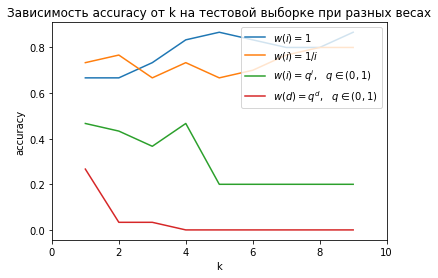

In [122]:
err = []
err_w = []
err_ww = []
err_wd = []
k_max = 10
for k in range(1,k_max):
    y_pred = knn(X_train, y_train, X_test, k)
    y_pred_w = knn_w(X_train, y_train, X_test, k)
    y_pred_ww = knn_ww(X_train, y_train, X_test, k, q)
    y_pred_wd = knn_wd(X_train, y_train, X_test, k, q)
    err.append(accuracy(y_pred, y_test))
    err_w.append(accuracy(y_pred_w, y_test))
    err_ww.append(accuracy(y_pred_ww, y_test))
    err_wd.append(accuracy(y_pred_wd, y_test))
plt.title('Зависимость accuracy от k на тестовой выборке при разных весах')    
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xlim(0, k_max)
plt.plot(list(range(1,k_max)), err, label='$w(i) = 1$')
plt.plot(list(range(1,k_max)), err_w, label='$w(i) = 1/i$')
plt.plot(list(range(1,k_max)), err_ww, label='$w(i) = q^{i}$,   $q \in (0,1)$')
plt.plot(list(range(1,k_max)), err_wd, label='$w(d) = q^{d}$,   $q \in (0,1)$')
plt.legend(loc='upper right')
plt.show()

Вывод: точность (accuracy) классификации сильно зависит от выбора веса!!! оптимальное  k = 4